# 1. Convolutional Neural Network (CNN)

## 1.1. Ý tưởng

- Áp dụng các bộ lọc lên ảnh trước khi huấn luyện mạng neuron
- Sau khi các tấm ảnh đi qua bộ lọc thì các đặc trưng của tấm ảnh sẽ trở nên nổi bật và chúng ta có thể dùng chúng để  nhận diện hình ảnh


## 1.2. Cấu trúc của mạng

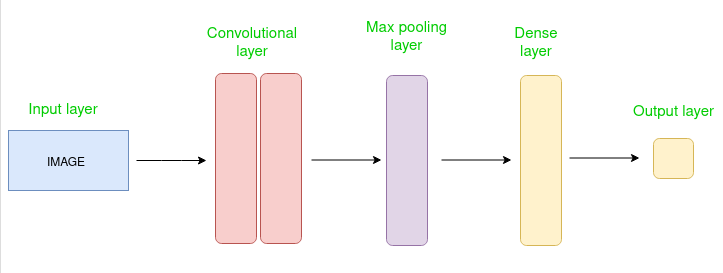

### 1.2.1.  Lớp Tích Chập (Convolutional Layer)

- Lớp tích chập là nền tảng của CNN, được thiết kế để tự động và thích ứng trích xuất các đặc trưng từ dữ liệu đầu vào (như ảnh). Nó áp dụng các bộ lọc (filters) trên đầu vào để phát hiện các đặc trưng cục bộ như cạnh, góc, và các dạng hình học phức tạp hơn.

- Ví dụ về bộ lọc

  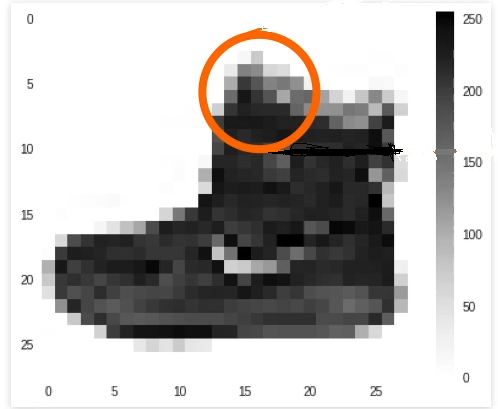

    Tại điểm khoanh tròn có các giá trị điểm ảnh là
  \begin{matrix}
  0 & 64 & 128\\
  48 & 192 & 144\\
  142 & 226 & 168
  \end{matrix}

  và giá trị điểm ảnh hiện tại là: 192

  Giả sử định nghĩa một bộ lọc có giá trị là:
  \begin{matrix}
  -1 & 0 & -2\\
  0.5 & 4.5 & -1.5\\
  1.5 & 2 & -3
  \end{matrix}

  Sau đó nhân giá trị các điểm ảnh với các giá trị trong bộ lọc tương ứng với nó sau sau đó thì lấy tổng của tất cả tạo thành giá trị đầu ra cho điểm ảnh này.

  \begin{equation}
  \text{CURRENT_PIXEL_VALUE} = 192
  \end{equation}

  \begin{equation}
    \text{NEW_PIXEL_VALUE} = (-1 * 0) + (0 * 64) + (-2 * 128) + \\
    \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad  (0.5 * 48) + (4.5 * 192) + (-1.5 * 144) + \\
    \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad
    (1.5 * 42) + (2 *226) + (-3 * 168)
  \end{equation}



- Ví dụ về một số bộ lọc cụ thể
  - Khi áp dụng sẽ xóa tất cả các thứ chỉ để lại đường dọc
    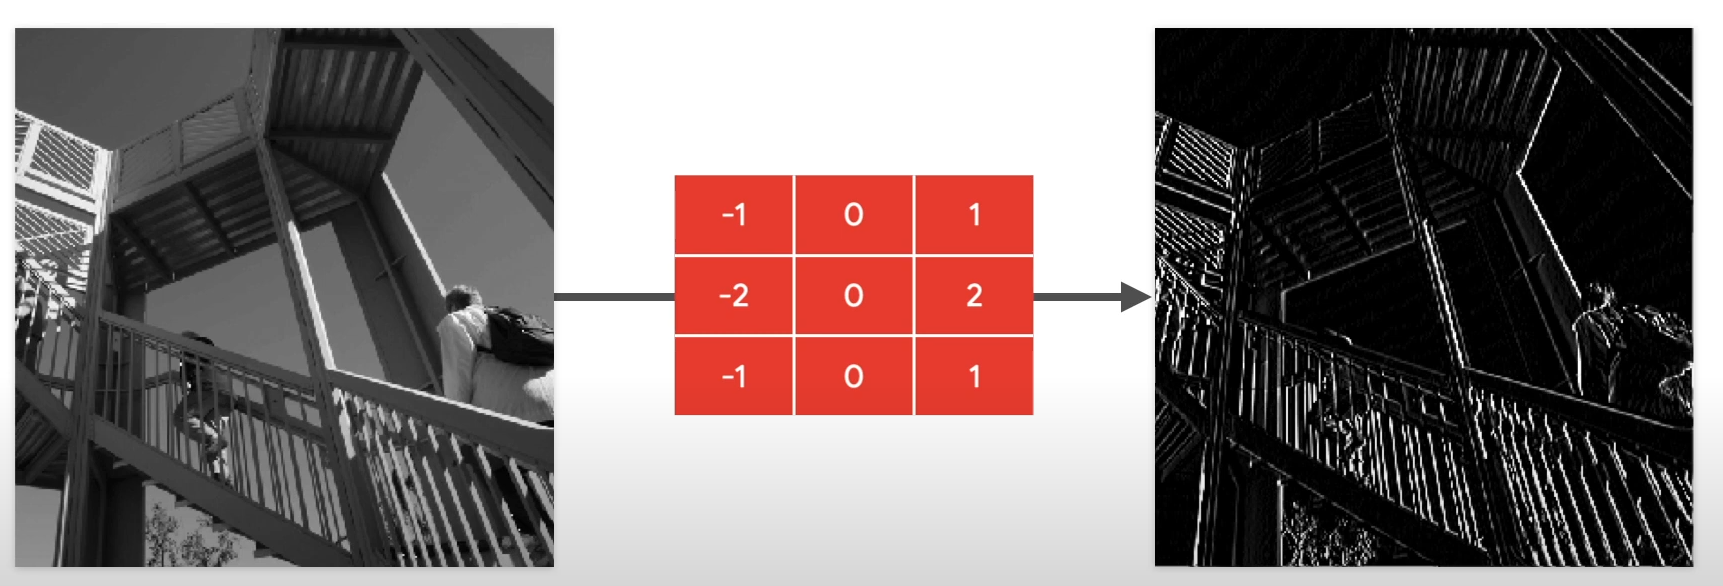

  - Khi áp dụng sẽ xóa hết tất cả mọi thứ chỉ để lại đường ngang
    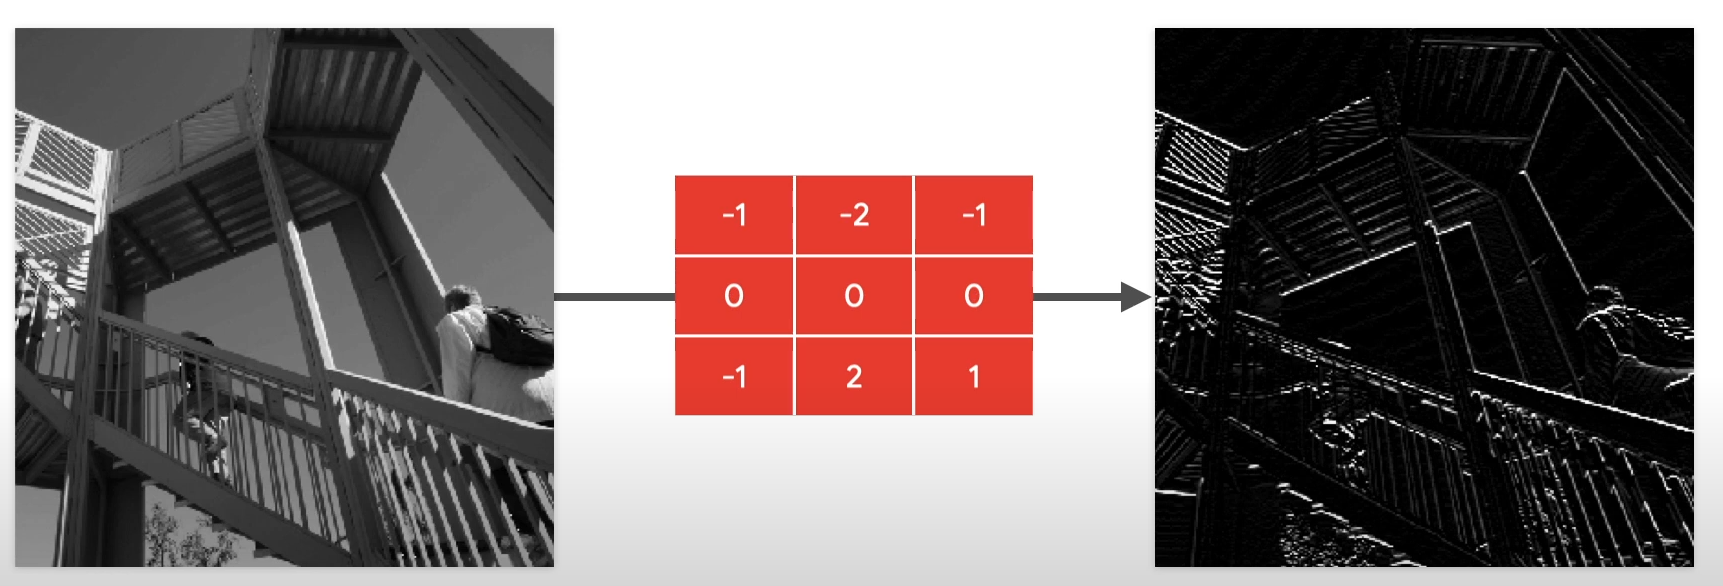



### 1.2.2. Max Pooling Layer

- Lớp pooling giảm kích thước của bản đồ đặc trưng, từ đó giảm số lượng tham số và tính toán trong mạng, đồng thời giúp mô hình bền vững hơn với các dịch chuyển và biến dạng nhỏ trong ảnh.
- Đối với mỗi vùng nhỏ (thường là 2x2 hoặc 3x3) trong bản đồ đặc trưng, lớp này giữ lại giá trị lớn nhất và bỏ qua các giá trị khác. Điều này giúp giữ lại các đặc trưng quan trọng nhất.

- Ví dụ: lớp Max Pooling 2x2 sẽ chọn ra từ ảnh đầu vào giá trị điểm ảnh lớn nhất trong các nhóm điểm ảnh với kích thức 2x2

  Ban đầu giá trị các điểm ảnh là

  \begin{matrix}
  0 & 64 & 128 & 128\\
  48 & 192 & 144 & 144\\
  142 & 226 & 168 & 0\\
  255 & 0 & 0 & 64
  \end{matrix}

  Sau khi sử dụng Max Pooling 2x2 sẽ trở thành:

  \begin{matrix}
  192 & 144\\
  255 & 168
  \end{matrix}

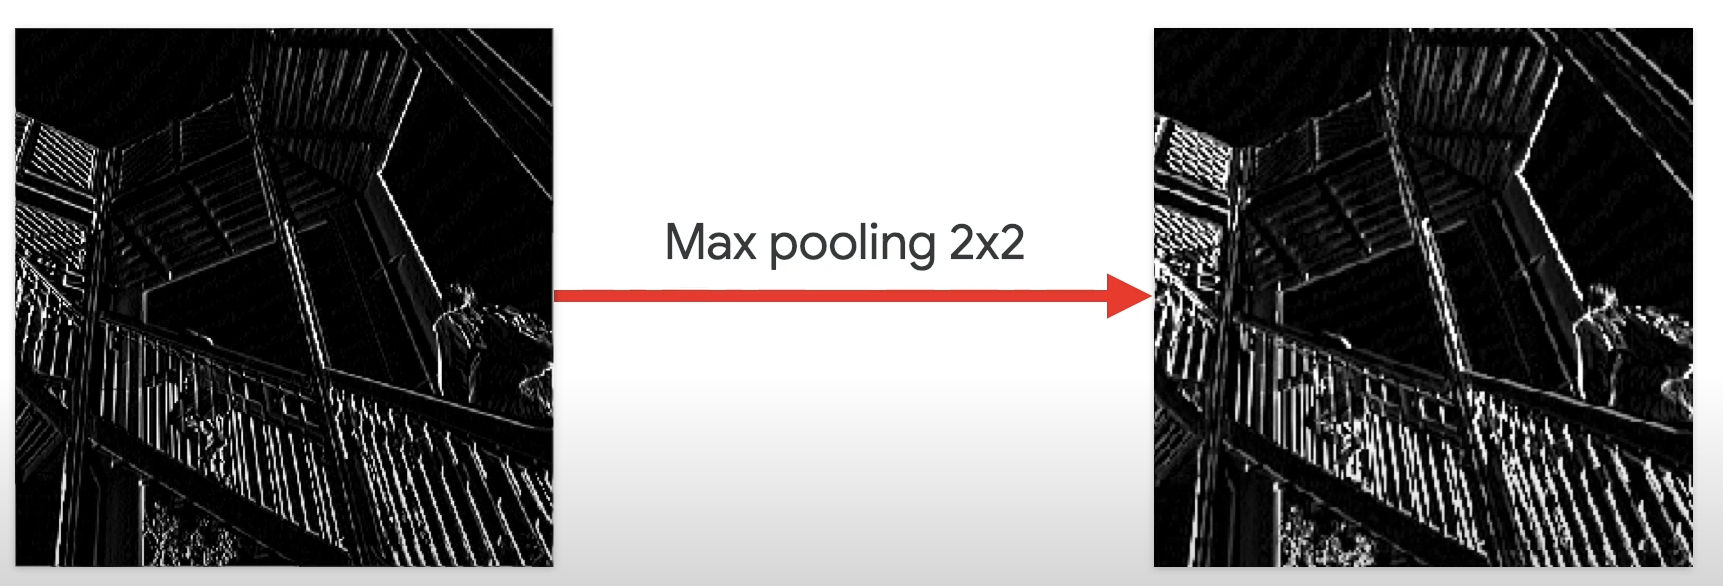

Tấm ảnh sẽ chỉ có kích thước bằng 1/4 tấm ảnh ban đầu, nhưng các đường vẫn được giữ nguyên và nổi bật hơn các đường gốc.

### 1.2.3. Lớp Kết Nối Đầy Đủ (Dense Layer)

- Lớp dense, hay lớp kết nối đầy đủ, là lớp cuối cùng trong CNN, chịu trách nhiệm cho việc phân loại hoặc dự đoán dựa trên các đặc trưng đã được trích xuất và giảm kích thước từ các lớp trước đó.

# 2. Ví dụ minh họa

## 2.1. Import thư viện

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import pickle

## 2.2. Chuẩn bị dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/CIFAR-10

/content/drive/MyDrive/ColabNotebooks/CIFAR-10


In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2024-06-07 03:53:26--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  17.6MB/s    in 11s     

2024-06-07 03:53:38 (15.0 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
!tar -xvf  'cifar-10-python.tar.gz' -C '/content/drive/MyDrive/ColabNotebooks/CIFAR-10'

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

save_path = '/content/drive/MyDrive/ColabNotebooks/CIFAR-10/'

# Lưu dữ liệu train
with open(save_path + 'train_images.pkl', 'wb') as f:
    pickle.dump(train_images, f)
with open(save_path + 'train_labels.pkl', 'wb') as f:
    pickle.dump(train_labels, f)

# Lưu dữ liệu test
with open(save_path + 'test_images.pkl', 'wb') as f:
    pickle.dump(test_images, f)
with open(save_path + 'test_labels.pkl', 'wb') as f:
    pickle.dump(test_labels, f)

In [ ]:

load_path = '/content/drive/MyDrive/ColabNotebooks/CIFAR-10/'

# Đọc dữ liệu train
with open(load_path + 'train_images.pkl', 'rb') as f:
    train_images = pickle.load(f)
with open(load_path + 'train_labels.pkl', 'rb') as f:
    train_labels = pickle.load(f)

# Đọc dữ liệu test
with open(load_path + 'test_images.pkl', 'rb') as f:
    test_images = pickle.load(f)
with open(load_path + 'test_labels.pkl', 'rb') as f:
    test_labels = pickle.load(f)

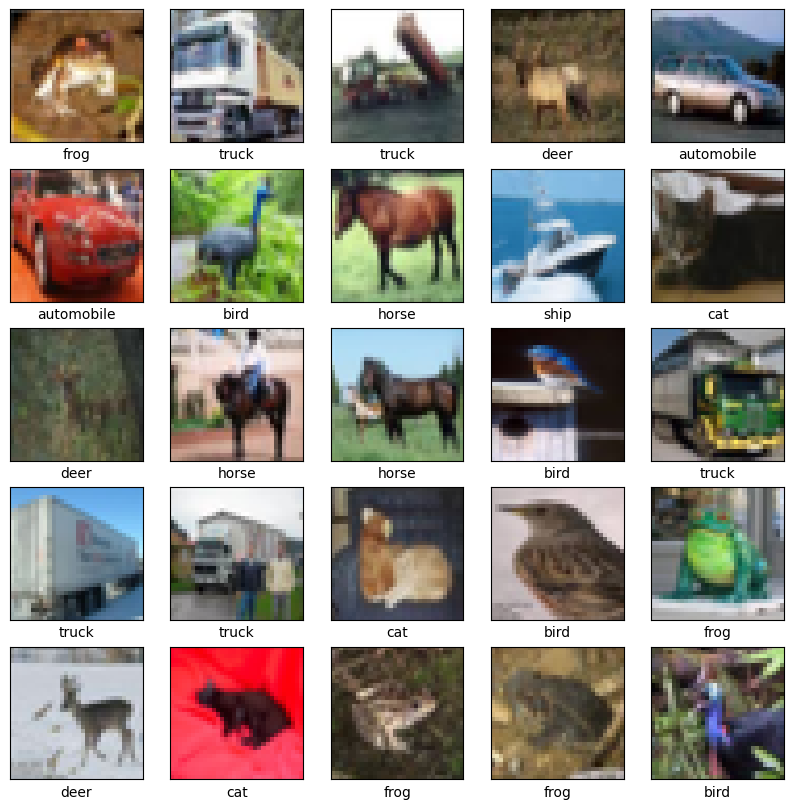

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 2.3. Tạo mạng CNN

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## 2.4. Compile và train model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/ColabNotebooks/cnn.keras',save_best_only=True)

model.fit(
    train_images,
    train_labels,
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[early, checkpoint],
    steps_per_epoch=100,
    validation_steps=10,
)

Epoch 1/100
100/100 [==============================] - 8s 30ms/step - loss: 1.8759 - accuracy: 0.3146 - val_loss: 1.6006 - val_accuracy: 0.4182
Epoch 2/100
100/100 [==============================] - 1s 13ms/step - loss: 1.5219 - accuracy: 0.4433 - val_loss: 1.4204 - val_accuracy: 0.4868
Epoch 3/100
100/100 [==============================] - 1s 14ms/step - loss: 1.3804 - accuracy: 0.5019 - val_loss: 1.3352 - val_accuracy: 0.5157
Epoch 4/100
100/100 [==============================] - 1s 14ms/step - loss: 1.2866 - accuracy: 0.5428 - val_loss: 1.2426 - val_accuracy: 0.5610
Epoch 5/100
100/100 [==============================] - 2s 16ms/step - loss: 1.2177 - accuracy: 0.5701 - val_loss: 1.2166 - val_accuracy: 0.5685
Epoch 6/100
100/100 [==============================] - 2s 16ms/step - loss: 1.1489 - accuracy: 0.5986 - val_loss: 1.1504 - val_accuracy: 0.5981
Epoch 7/100
100/100 [==============================] - 1s 14ms/step - loss: 1.1020 - accuracy: 0.6144 - val_loss: 1.1067 - val_accuracy:

<Axes: >

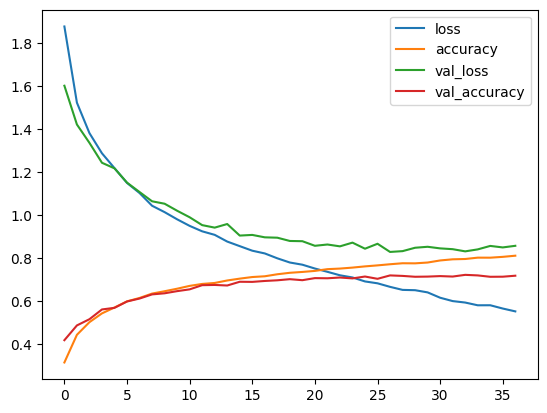

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"{test_acc * 100} %")

313/313 - 1s - loss: 0.8283 - accuracy: 0.7192 - 1s/epoch - 4ms/step
71.92000150680542 %


1/1 [==============================] - 0s 22ms/step


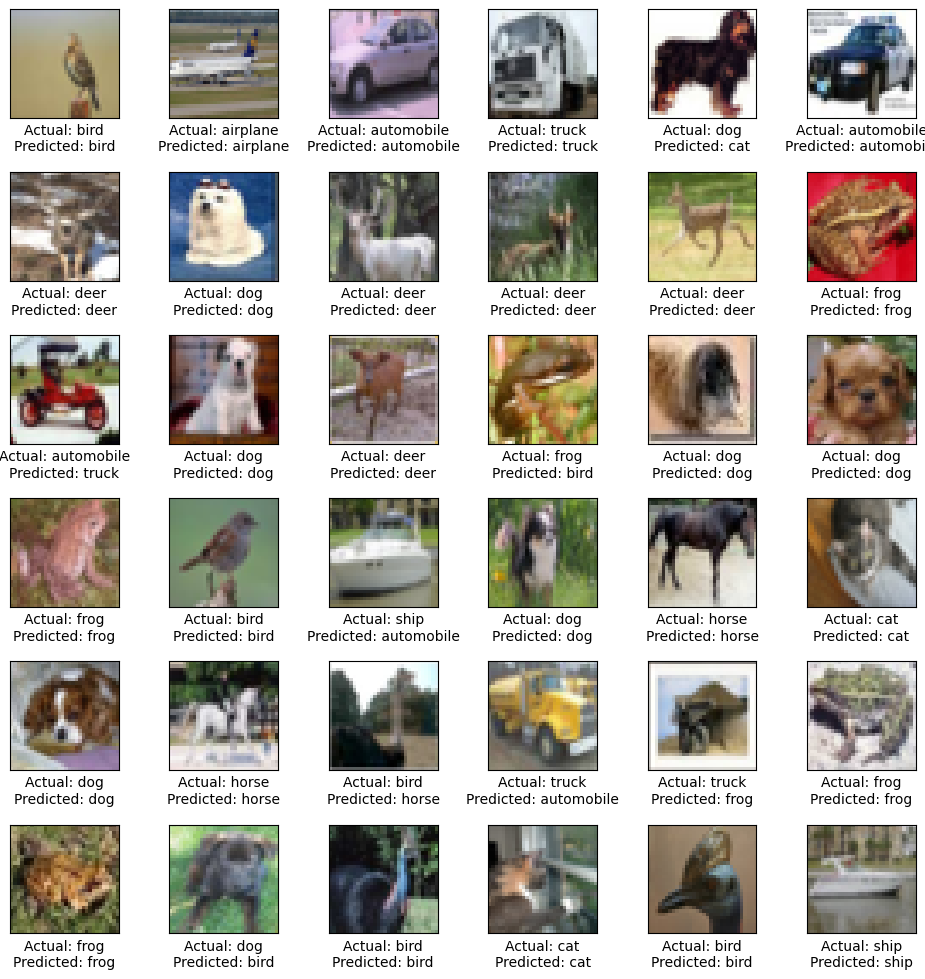

In [ ]:
# Load model đã được train
model = tf.keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/cnn.keras')

# Danh sách các tên lớp
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Chọn 36 ảnh ngẫu nhiên từ tập kiểm tra
random_indices = np.random.choice(len(test_images), 36, replace=False)

plt.figure(figsize=(12, 12))
for i, random_idx in enumerate(random_indices):
    test_image = test_images[random_idx]
    test_label = test_labels[random_idx][0]

    # Thêm một chiều vào ảnh để phù hợp với định dạng đầu vào của mô hình
    test_image_expanded = np.expand_dims(test_image, axis=0)

    # Dự đoán lớp của ảnh
    predictions = model.predict(test_image_expanded)
    predicted_class = np.argmax(predictions)

    # Hiển thị ảnh đã chọn cùng với nhãn thực tế và nhãn dự đoán
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_image)
    plt.xlabel(f"Actual: {class_names[test_label]}\nPredicted: {class_names[predicted_class]}")

plt.subplots_adjust(hspace=0.5)
plt.show()
